# Parsing no2 files
* read csv file
* skip empty lines
* read in lines for DF
* add 'bundesland' and year as new columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
paths = glob.glob("*.csv")

In [3]:
#path = "DataScienceProjekt/Stickstoff/CSV/no2_2002.csv"

In [4]:
dfs = []

for file in paths:
    year = file.split("_")[-1].split(".")[0]
  
    data = []
    ofile = open(file, "r")
    start = False
    bundesland = None
    linec = 0
    for line in ofile:
        linec+=1
        if start == False:
            if line.lower().startswith("stat"):
                start = True
        else:    
            if line.startswith("@"):
                bundesland = line.split("@")[1]
                if bundesland == "": continue
            else:
                data.append((bundesland + "@" + year +"@"+line.replace("\n", "")).split("@")[:8])
                
    ofile.close()
    
    dfs.append(pd.DataFrame(data, columns= ["bundesland", "jahr", "station", "name", "umgebungstyp", "emissionstyp", "jahresmittel", "maxstundenwert"]))
    

In [5]:
#stickstoff = pd.DataFrame(data, columns= ["station", "name", "umgebungstyp", "emissionstyp", "jahresmittel", "maxstundenwert", ">290",">200","bundesland", "jahr"])

* nicht erfasste Daten als "---"
* "n*\\-1)"
* Stations teilweise mit '   '
* UBA

In [6]:
dfs[0]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
0,Brandenburg,2002,'DEBB001',Burg (Spreewald),vorstädtisches Gebiet,Hintergrund,10,69
1,Brandenburg,2002,'DEBB006',Cottbus-Süd,städtisches Gebiet,Hintergrund,19,107
2,Brandenburg,2002,'DEBB009',Forst,vorstädtisches Gebiet,Hintergrund,16,83
3,Brandenburg,2002,'DEBB021',Potsdam-Zentrum,städtisches Gebiet,Hintergrund,21,111
4,Brandenburg,2002,'DEBB024',Senftenberg,städtisches Gebiet,Hintergrund,19,113
...,...,...,...,...,...,...,...,...
445,UBA,2002,'DEUB038',Aukrug,ländliches Gebiet,Hintergrund,13,65
446,UBA,2002,'DEUB039',Falkenberg,ländliches Gebiet,Hintergrund,9,57
447,UBA,2002,'DEUB040',Schorfheide,ländliches Gebiet,Hintergrund,8,69
448,UBA,2002,'DEUB041',Raisting,ländliches Gebiet,Hintergrund,9,69


In [7]:
dfs[16][dfs[16]["maxstundenwert"].str.contains("-")]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
1,Baden-Württemberg,2018,DEBW219,Backnang Eugen-Adolff-Straße,städtisches Gebiet,Verkehr,49,--- 1)
3,Baden-Württemberg,2018,DEBW213,Balingen Schömberger Straße,vorstädtisches Gebiet,Verkehr,31,--- 1)
7,Baden-Württemberg,2018,DEBW220,Esslingen Grabbrunnenstraße,städtisches Gebiet,Verkehr,45,--- 1)
11,Baden-Württemberg,2018,DEBW226,Friedrichshafen Maybachstraße,städtisches Gebiet,Verkehr,39,--- 1)
14,Baden-Württemberg,2018,DEBW151,Heidelberg Mittermaierstraße,städtisches Gebiet,Verkehr,38,--- 1)
...,...,...,...,...,...,...,...,...
512,Thüringen,2018,DETH098,Gera Theaterstr. PS,städtisches Gebiet,Verkehr,32,--- 1)
516,Thüringen,2018,DETH075,Jena Westbahnhofstr.,städtisches Gebiet,Verkehr,29,--- 1)
518,Thüringen,2018,DETH100,Mühlhausen Petristeinweg,städtisches Gebiet,Verkehr,36,--- 1)
524,Thüringen,2018,DETH102,Suhl Dr.Th.-Neubauer-Str.,städtisches Gebiet,Verkehr,32,--- 1)


In [8]:
len(dfs)

18

In [9]:
stickstoff = pd.concat(dfs, ignore_index = True)

In [10]:
stickstoff

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
0,Brandenburg,2002,'DEBB001',Burg (Spreewald),vorstädtisches Gebiet,Hintergrund,10,69
1,Brandenburg,2002,'DEBB006',Cottbus-Süd,städtisches Gebiet,Hintergrund,19,107
2,Brandenburg,2002,'DEBB009',Forst,vorstädtisches Gebiet,Hintergrund,16,83
3,Brandenburg,2002,'DEBB021',Potsdam-Zentrum,städtisches Gebiet,Hintergrund,21,111
4,Brandenburg,2002,'DEBB024',Senftenberg,städtisches Gebiet,Hintergrund,19,113
...,...,...,...,...,...,...,...,...
8681,Umweltbundesamt,2019,DEUB004,Schauinsland,ländlich regional,Hintergrund,2,0
8682,Umweltbundesamt,2019,DEUB029,Schmücke,ländliches Gebiet,Hintergrund,3,0
8683,Umweltbundesamt,2019,DEUB005,Waldhof,ländliches Gebiet,Hintergrund,7,0
8684,Umweltbundesamt,2019,DEUB001,Westerland,ländliches Gebiet,Hintergrund,5,0


* remove empty space and nonsense number (e.g. 47 2)

In [11]:
def splitit(val):
    if " " in val:
        return val.split(" ")[0]
    else:
        return val
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].apply(splitit)

In [12]:
stickstoff[stickstoff["jahresmittel"]=="-999"]

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert
6246,Hessen,2015,DEHE131,Limburg-Schiede,städtisches Gebiet,Verkehr,-999,23


* replace , with . for easy type casting

In [13]:
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].str.replace(",",".")

* cast column to float

In [14]:
stickstoff["jahresmittel"] = stickstoff["jahresmittel"].astype(float)

* drop row with extreme outlier -999

In [15]:
stickstoff.drop(190, axis=0, inplace = True)

* aggregate over years and plot mean jahresmittel values

In [16]:
mean = stickstoff.groupby("jahr").agg("mean")

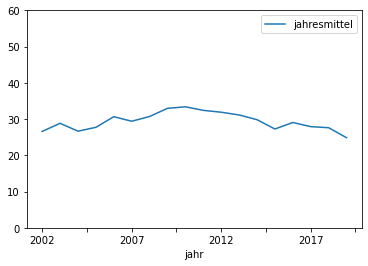

In [17]:
mean.plot(ylim=(0,60))

In [18]:
stickstoff["jahresmittel"].sort_values(ascending=False).unique()

array([ 121. ,  112. ,  109. ,  106. ,  104. ,  100. ,   99. ,   98. ,
         97. ,   95. ,   93. ,   92. ,   91. ,   90. ,   89. ,   88. ,
         87. ,   86. ,   85. ,   84. ,   83. ,   82. ,   81. ,   80. ,
         79. ,   78. ,   77. ,   76. ,   75. ,   74. ,   73. ,   72. ,
         71. ,   70. ,   69. ,   68. ,   67. ,   66. ,   65. ,   64. ,
         63. ,   62. ,   61. ,   60. ,   59. ,   58. ,   57. ,   56. ,
         55. ,   54. ,   53. ,   52. ,   51. ,   50. ,   49. ,   48. ,
         47. ,   46. ,   45. ,   44. ,   43. ,   42. ,   41. ,   40. ,
         39. ,   38. ,   37. ,   36. ,   35. ,   34. ,   33. ,   32. ,
         31. ,   30. ,   29. ,   28. ,   27. ,   26. ,   25. ,   24. ,
         23. ,   22. ,   21. ,   20. ,   19. ,   18. ,   17. ,   16. ,
         15. ,   14. ,   13. ,   12. ,   11. ,   10. ,    9.8,    9.5,
          9. ,    8.9,    8.8,    8.7,    8.6,    8.5,    8.4,    8.2,
          8.1,    8. ,    7.8,    7.7,    7.6,    7.5,    7.2,    7. ,
      

In [19]:
mean

,jahresmittel
jahr,
2002,26.596882
2003,28.833333
2004,26.660934
2005,27.724816
2006,30.661905
2007,29.403756
2008,30.709278
2009,32.964912
2010,33.384458


#### Check umgebungstyp variable

In [20]:
stickstoff["umgebungstyp"].unique()

array(['vorstädtisches Gebiet', 'städtisches Gebiet', 'ländlich regional',
       'ländlich stadtnah', 'ländliches Gebiet', 'ländlich Hintergrund',
       'ländlich abgelegen', 'ländliches regional', 'ländlich reginal',
       'ländliches stadtnah', 'städtisches Gebiet '], dtype=object)

In [21]:
stickstoff["umgebungstyp"] = stickstoff["umgebungstyp"].str.strip(" ").str.replace("reginal","regional").str.replace("ländliches","ländlich")

In [22]:
def group_up(val):
    if "länd" in val:
        return "ländlich"
    elif "vorst" in val:
        return "vorstädtisch"
    else:
        return "städtisch"

In [23]:
stickstoff["umgebungstyp_grob"] = stickstoff["umgebungstyp"].apply(group_up)

In [24]:
stickstoff["umgebungstyp_grob"].unique()

array(['vorstädtisch', 'städtisch', 'ländlich'], dtype=object)

In [25]:
mean = stickstoff.groupby(["jahr", "umgebungstyp_grob"]).agg("mean")

In [26]:
mean_st = stickstoff[stickstoff["umgebungstyp_grob"] == "städtisch"].groupby("jahr").agg("mean")

In [27]:
mean_vs = stickstoff[stickstoff["umgebungstyp_grob"] == "vorstädtisch"].groupby("jahr").agg("mean")

In [28]:
mean_la = stickstoff[stickstoff["umgebungstyp_grob"] == "ländlich"].groupby("jahr").agg("mean")

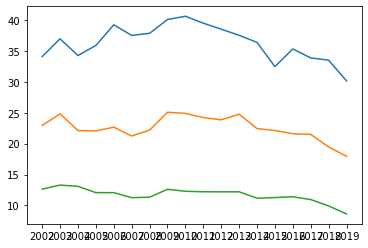

In [29]:
plt.plot(mean_st)
plt.plot(mean_vs)
plt.plot(mean_la)

In [30]:
stickstoff["bundesland"].unique()

array(['Brandenburg', 'Berlin', 'Baden-Württemberg', 'Bayern', 'Bremen',
       'Hessen', 'Hamburg', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrrhein-Westfalen', 'Rheinland-Pfalz', 'Schleswig-Holstein',
       'Saarland', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen', 'UBA',
       'Nordrhein-Westfalen', 'Umweltbundesamt'], dtype=object)

* check umweltbundesamt

In [31]:
stickstoff[stickstoff["bundesland"] == "UBA"].shape

(78, 9)

In [32]:
stickstoff[stickstoff["bundesland"] == "Umweltbundesamt"].shape

(79, 9)

* Replace 'Ü' with 'UE' in Bundesland
* to conform it to other dataset

In [33]:
stickstoff["bundesland"] = stickstoff["bundesland"].str.upper().str.replace("Ü", "UE")

In [34]:
stickstoff["bundesland"].unique()

array(['BRANDENBURG', 'BERLIN', 'BADEN-WUERTTEMBERG', 'BAYERN', 'BREMEN',
       'HESSEN', 'HAMBURG', 'MECKLENBURG-VORPOMMERN', 'NIEDERSACHSEN',
       'NORDRRHEIN-WESTFALEN', 'RHEINLAND-PFALZ', 'SCHLESWIG-HOLSTEIN',
       'SAARLAND', 'SACHSEN', 'SACHSEN-ANHALT', 'THUERINGEN', 'UBA',
       'NORDRHEIN-WESTFALEN', 'UMWELTBUNDESAMT'], dtype=object)

* see if bundesländer are the same

In [35]:
tester = "BADEN-WUERTTEMBERG,BAYERN,BERLIN,BRANDENBURG,BREMEN,HAMBURG,HESSEN,MECKLENBURG-VORPOMMERN,NIEDERSACHSEN,NORDRHEIN-WESTFALEN,RHEINLAND-PFALZ,SAARLAND,SACHSEN,SACHSEN-ANHALT,SCHLESWIG-HOLSTEIN,THUERINGEN"

In [36]:
for land in stickstoff["bundesland"].unique():
    if land not in tester.split(","):
        print(land)

NORDRRHEIN-WESTFALEN
UBA
UMWELTBUNDESAMT


* correct name

In [ ]:
stickstoff["bundesland"] = stickstoff["bundesland"].str.replace("NORDRRHEIN", "NORDRHEIN")

* translate to better names for matching with other dataset

In [38]:
def translate(val):
    val1 = val.replace("Ä","AE").replace("Ö", "OE").replace("Ü", "UE")
    val1 = val1.upper()
    return val1

stickstoff["name"] = stickstoff["name"].apply(translate)

In [39]:
stickstoff["name"]

0       BURG (SPREEWALD)
1            COTTBUS-SÜD
2                  FORST
3        POTSDAM-ZENTRUM
4           SENFTENBERG 
              ...       
8681        SCHAUINSLAND
8682            SCHMÜCKE
8683             WALDHOF
8684          WESTERLAND
8685              ZINGST
Name: name, Length: 8685, dtype: object

* save as pickle

In [40]:
stickstoff.to_pickle("stickstoff_daten.pkl")